### **SALARY ESTIMATION**: Stack Overflow 2023 Developer Survey

**Task 1**: Your task as a data engineer is to identify the data quality issues in the dataset and develop a solution to address these issues. Check to see if the application of these corrective measures helped in improving the model output.
*Link to dataset*:

- https://www.kaggle.com/datasets/stackoverflow/stack-overflow-2023-developers-survey

**Task 2**: Develop a scalable architecture for the data correction pipeline. You should consider suitable cloud-based storage and tools that could be used for data ingestion and processing. Document the rationale behind the selection of the cloud-based storage and tools for data ingestion, processing, and monitoring and provide any additional support materials such as diagrams, charts, or tables. Consider factors such as scalability, flexibility, cost-effectiveness, and integration capabilities. Outline the deployment strategy for deploying the data correction pipeline on a cloud platform. Describe how resources will be provisioned, configured, and managed.

### **TASK 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn import model_selection
from sklearn import metrics

from scipy import stats


%matplotlib inline

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
survey_df = pd.read_csv('/content/drive/MyDrive/Data/NTU/survey_results_public.csv')

In [ ]:
survey_df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


### Exploratory Data Analysis

In [ ]:
# Display basic information about the dataset for initial analysis
dataset_info = survey_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [ ]:
# Check distribution of numerical values
survey_df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [ ]:
# Check shape of dataframe
survey_df.shape

(89184, 84)

The dataset contains survey responses with a wide range of information about developers, such as their age, employment status, remote work preferences, coding activities, education level, learning resources, and many other features. There are 84 columns in total, which signifies a broad set of data points per respondent. Given the task of identifying data quality issues and developing a solution to address these issues for model training, It is important to focus on some key steps:

**Identifying Missing Values**: Understanding the extent of missing data across different features, which is crucial for a model's performance.
Assessing Categorical Data: Many columns appear to contain categorical data (like MainBranch, Employment, RemoteWork, etc.), which might require encoding for model training.

**Evaluating Numerical Data**: While there are categorical data, there's also numerical data that should be checked for outliers or incorrect values (e.g., ConvertedCompYearly for salary).

**Handling Text Data**: Some columns contain text data that may require preprocessing or feature extraction for use in a ML model (e.g., CodingActivities, LearnCode).

**Data Consistency**: Ensuring that similar data points are consistently formatted across the dataset.

In [ ]:
# Check for null values
null_values = survey_df.isnull().sum()
null_values

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

In [ ]:
# Analyze missing values across the dataset
missing_data = survey_df.isnull().mean().sort_values(ascending=False)
missing_data

AINextVery similar                     0.970611
AINextSomewhat similar                 0.930055
AINextNeither different nor similar    0.926007
AINextVery different                   0.858035
AIDevWantToWorkWith                    0.780375
                                         ...   
AISelect                               0.013579
Q120                                   0.000000
Age                                    0.000000
MainBranch                             0.000000
ResponseId                             0.000000
Length: 84, dtype: float64

In [ ]:
# Check for duplicate rows
duplicate_rows = survey_df.duplicated().sum()
duplicate_rows

0

In [ ]:
# Evaluate target variable - the distribution of 'ConvertedCompYearly' (annual compensation in USD)
comp_yearly_desc = survey_df['ConvertedCompYearly'].describe()
comp_yearly_desc

count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64

In [ ]:
# Number of missing values for annual compensation
survey_df['ConvertedCompYearly'].isnull().sum()

41165

In [ ]:
# valid responses for annual compensation
survey_df.shape[0] - survey_df['ConvertedCompYearly'].isnull().sum()

48019

In [ ]:
# mean annual compensation
survey_df['ConvertedCompYearly'].mean()

103110.08171765343

In [ ]:
# median annual compensation
survey_df['ConvertedCompYearly'].median()

74963.0

In [ ]:
# minimum annual compensation
survey_df['ConvertedCompYearly'].min()

1.0

In [ ]:
# maximum annual compensation
survey_df['ConvertedCompYearly'].max()

74351432.0

**Data Quality Issues Identified**

1. **High Proportion of Missing Values**: Certain columns have a very high proportion of missing values, with the top missing columns showing more than 85% data missing, which poses significant challenges for model training.

* Examples include columns like AINextVery similar, AINextSomewhat similar,
AINextNeither different nor similar, and AINextVery different having more than 85% missing data. A decision needs to be made regarding whether to impute, drop, or otherwise handle these columns.

2. **Annual Compensation (ConvertedCompYearly) Distribution**:

* **Count**: There are 48,019 valid responses for annual compensation.
* **Mean and Median**: The mean annual compensation is roughly 103,110 USD while the median is 74,963 USD indicating a right-skewed distribution.
* **Min and Max**: The minimum salary is 1 USD, and the maximum is over 74 million USD, which is highly unlikely and suggests outliers in the salary data.
* **Standard Deviation**: The standard deviation is approximately 681,418 USD which is very high, indicating significant variability in the data.

In [ ]:
# Dropping columns with more than 85% missing data
cols_to_drop = missing_data[missing_data > 0.85].index
df_cleaned = survey_df.drop(columns=cols_to_drop)



In [ ]:
# Handling outliers in 'ConvertedCompYearly'
# Interquartile Range (IQR) method to detect and remove outliers
Q1_comp = df_cleaned['ConvertedCompYearly'].quantile(0.25)
Q3_comp = df_cleaned['ConvertedCompYearly'].quantile(0.75)
IQR_comp = Q3_comp - Q1_comp

# Defining thresholds
lower_bound = Q1_comp - 1.5 * IQR_comp
upper_bound = Q3_comp + 1.5 * IQR_comp

# Filtering the dataset to remove outliers
df_cleaned = df_cleaned[(df_cleaned['ConvertedCompYearly'] >= lower_bound) &
                        (df_cleaned['ConvertedCompYearly'] <= upper_bound)]



In [ ]:
# Re-evaluating the distribution of 'ConvertedCompYearly'
comp_yearly_desc_cleaned = df_cleaned['ConvertedCompYearly'].describe()

comp_yearly_desc_cleaned

count     45813.000000
mean      81323.397464
std       53067.505365
min           1.000000
25%       42836.000000
50%       72000.000000
75%      112377.000000
max      238000.000000
Name: ConvertedCompYearly, dtype: float64

In [ ]:
missing_data_cleaned = df_cleaned.isnull().mean().sort_values(ascending=False)

missing_data_cleaned.head(10)

AIDevWantToWorkWith              0.778840
AIToolNot interested in Using    0.759108
AINextSomewhat different         0.734966
AIDevHaveWorkedWith              0.710803
AIToolInterested in Using        0.624626
AIToolCurrently Using            0.592365
AIAcc                            0.570580
LearnCodeCoursesCert             0.559972
AISearchWantToWorkWith           0.495493
MiscTechWantToWorkWith           0.449043
dtype: float64

**Data Cleaning to address identified issues**

**Dropping Columns with Excessive Missing Data**: Columns with more than 85% missing data were removed. This helped in reducing the complexity and improving the potential quality of the dataset for training purposes.

**Handling Outliers in ConvertedCompYearly**: Outlier salaries were removed using the Interquartile Range (IQR) method, focusing on values within a reasonable range. This step refined the annual compensation data by excluding unrealistic values.

**Reduced Missing Data Proportion**: The cleaned dataset still has columns with a high proportion of missing data, with the top missing columns pertaining to AI development preferences and learning resources having significant missing values, suggesting further steps can be taken to handle these.

**Annual Compensation Distribution After Cleaning**:

* **Count**: 45,813 responses remain after outlier removal.
New Range: 1 USD to 238,000 USD with the minimum still being 1 USD which might need further review.
* **Mean**: The mean adjusted to approximately 81,323 USD which is lower than the original dataset, reflecting the removal of high outliers.
* **Standard Deviation**: Reduced to approximately 53,067 USD indicating a decrease in variability after outlier handling.

In [ ]:
# Review and handle unrealistic minimum salary values (e.g., less than $1000/year as unrealistic)
df_cleaned_filtered = df_cleaned[df_cleaned['ConvertedCompYearly'] > 1000]
df_cleaned_filtered.shape

(45121, 80)

In [ ]:
df_cleaned_filtered.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [ ]:
# Re-evaluate the distribution of 'ConvertedCompYearly' after further cleaning
comp_yearly_desc_filtered = df_cleaned_filtered['ConvertedCompYearly'].describe()
comp_yearly_desc_filtered

count     45121.000000
mean      82565.783781
std       52508.669990
min        1009.000000
25%       43821.000000
50%       73249.000000
75%      114000.000000
max      238000.000000
Name: ConvertedCompYearly, dtype: float64

In [ ]:
# Analyze missing values across filtered dataset
missing_data_filtered_subset = df_cleaned_filtered.isnull().mean().sort_values(ascending=False)
missing_data_filtered_subset

AIDevWantToWorkWith              0.779548
AIToolNot interested in Using    0.759225
AINextSomewhat different         0.735977
AIDevHaveWorkedWith              0.712130
AIToolInterested in Using        0.626227
                                   ...   
Country                          0.000000
EdLevel                          0.000000
Age                              0.000000
MainBranch                       0.000000
ConvertedCompYearly              0.000000
Length: 80, dtype: float64

In [ ]:
## Feature Extraction: Selecting only features that are likely correlated with salary levels or considered important for salary predictions
numerical_cols_to_retain = ['ConvertedCompYearly', 'WorkExp']

# Categorical columns identified as important for model prediction of target variable
categorical_cols_to_retain = ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'Age', 'CodingActivities', 'ProfessionalTech','DevType', 'OrgSize', 'Country']

# Creating a new DataFrame subset with only the selected columns
df_selected_subset = df_cleaned_filtered[categorical_cols_to_retain + numerical_cols_to_retain]

df_selected_subset.shape

(45121, 12)

In [ ]:
## Further data preprocessing to address missing or null values in selected columns

# Define the categorical columns to check for missing or null values.
categorical_cols_check = ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'Age', 'CodingActivities', 'ProfessionalTech','DevType', 'OrgSize', 'Country']

# Calculate the percentage of missing or null values for these columns
missing_values_percentage = df_selected_subset[categorical_cols_check].isnull().mean() * 100

missing_values_percentage

MainBranch           0.000000
Employment           0.026595
RemoteWork           0.135192
EdLevel              0.000000
Age                  0.000000
CodingActivities     0.179517
ProfessionalTech    33.634006
DevType              0.203896
OrgSize              0.075353
Country              0.000000
dtype: float64

In [ ]:
# Create an explicit copy
df_selected_subset = df_selected_subset.copy()

# Subset of categorical columns with a small percentage of missing values
small_missing_cols = ['Employment', 'RemoteWork', 'CodingActivities', 'DevType', 'OrgSize']

# Impute missing values in these columns with their respective modes
for col in small_missing_cols:
    mode_value = df_selected_subset[col].mode()[0]  # Getting the mode value for each column
    df_selected_subset[col].fillna(mode_value, inplace=True)



In [ ]:
# Recalculate the percentage of missing or null values to ensure imputation and column drop are successful
missing_values_percentage_imputed = df_selected_subset[categorical_cols_check[:-1] + small_missing_cols].isnull().mean() * 100
# Note: Recalculating for all considered columns except 'ProfessionalTech' which was dropped

missing_values_percentage_imputed

MainBranch           0.000000
Employment           0.000000
RemoteWork           0.000000
EdLevel              0.000000
Age                  0.000000
CodingActivities     0.000000
ProfessionalTech    33.634006
DevType              0.000000
OrgSize              0.000000
Employment           0.000000
RemoteWork           0.000000
CodingActivities     0.000000
DevType              0.000000
OrgSize              0.000000
dtype: float64

In [ ]:
# Dropping the 'ProfessionalTech' column due to its significantly high percentage of missing data
df_subset = df_selected_subset.drop(['ProfessionalTech'], axis=1)

In [ ]:
df_subset.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'Age',
       'CodingActivities', 'DevType', 'OrgSize', 'Country',
       'ConvertedCompYearly', 'WorkExp'],
      dtype='object')

In [ ]:
# Check for missing values
df_subset.isnull().sum()

MainBranch                 0
Employment                 0
RemoteWork                 0
EdLevel                    0
Age                        0
CodingActivities           0
DevType                    0
OrgSize                    0
Country                    0
ConvertedCompYearly        0
WorkExp                14322
dtype: int64

In [ ]:
#Explicit copy
df_subset = df_subset.copy()

In [ ]:
# Replace missing values with the median of the non-missing values in the 'WorkExp' column
df_subset['WorkExp'].fillna(df_subset['WorkExp'].median(), inplace=True)

In [ ]:
# Check for missing values
df_subset.isnull().sum()

MainBranch             0
Employment             0
RemoteWork             0
EdLevel                0
Age                    0
CodingActivities       0
DevType                0
OrgSize                0
Country                0
ConvertedCompYearly    0
WorkExp                0
dtype: int64

In [ ]:
df_subset.shape

(45121, 11)

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45121 entries, 3 to 89171
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           45121 non-null  object 
 1   Employment           45121 non-null  object 
 2   RemoteWork           45121 non-null  object 
 3   EdLevel              45121 non-null  object 
 4   Age                  45121 non-null  object 
 5   CodingActivities     45121 non-null  object 
 6   DevType              45121 non-null  object 
 7   OrgSize              45121 non-null  object 
 8   Country              45121 non-null  object 
 9   ConvertedCompYearly  45121 non-null  float64
 10  WorkExp              45121 non-null  float64
dtypes: float64(2), object(9)
memory usage: 4.1+ MB


In [ ]:
df_subset.head()

,MainBranch,Employment,RemoteWork,EdLevel,Age,CodingActivities,DevType,OrgSize,Country,ConvertedCompYearly,WorkExp
3,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Hobby,"Developer, front-end",100 to 499 employees,United States of America,156000.0,7.0
4,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Hobby;Contribute to open-source projects;Profe...,"Developer, full-stack",20 to 99 employees,Philippines,23456.0,6.0
5,I am a developer by profession,"Employed, full-time",Remote,Some college/university study without earning ...,35-44 years old,Hobby;Professional development or self-paced l...,"Developer, back-end",100 to 499 employees,United Kingdom of Great Britain and Northern I...,96828.0,22.0
6,I am a developer by profession,"Employed, full-time",Remote,Some college/university study without earning ...,35-44 years old,Hobby;Contribute to open-source projects;Profe...,"Developer, full-stack","1,000 to 4,999 employees",United States of America,135000.0,4.0
7,I am a developer by profession,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Hobby,"Developer, full-stack",10 to 19 employees,United States of America,80000.0,5.0


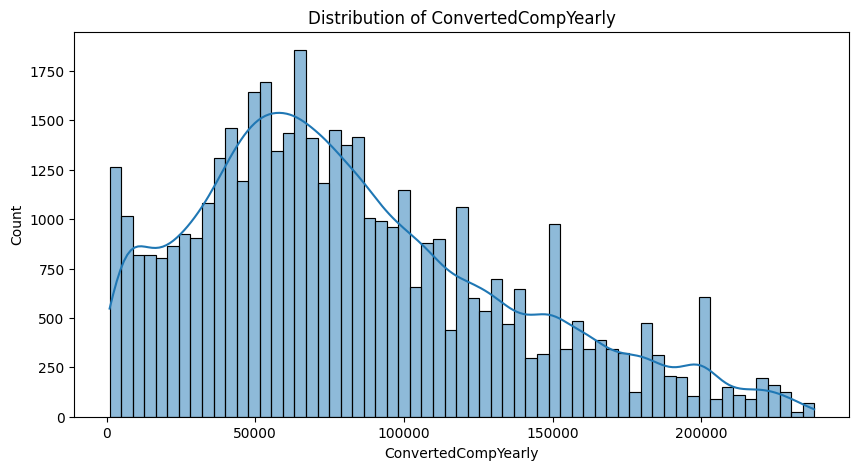

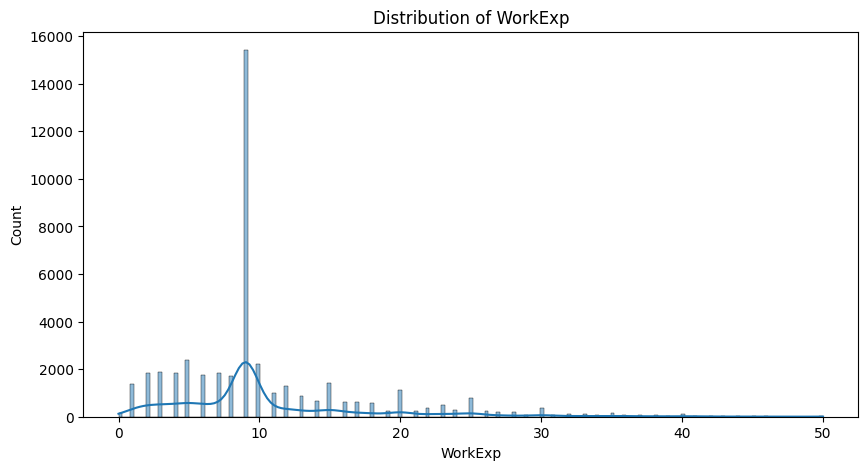

In [ ]:
# Distribution plots for numerical features
for column in df_subset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


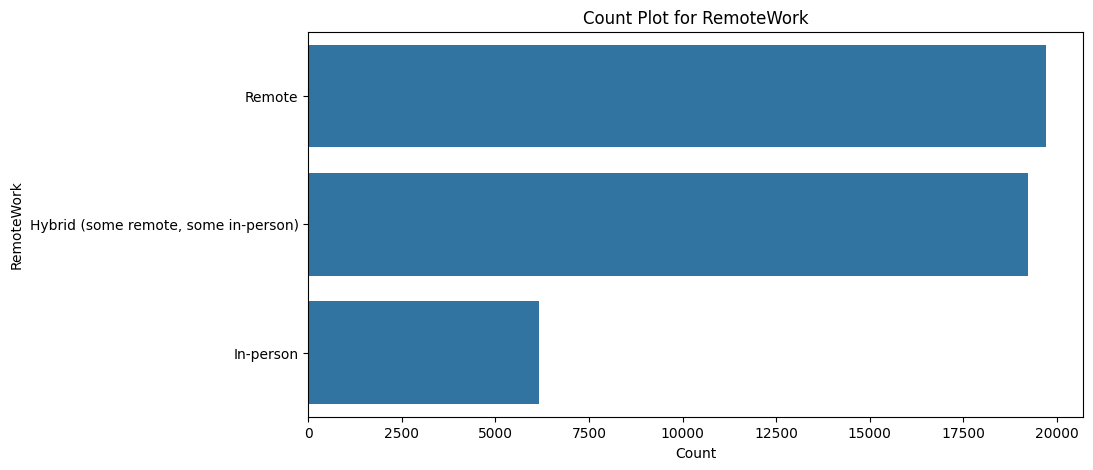

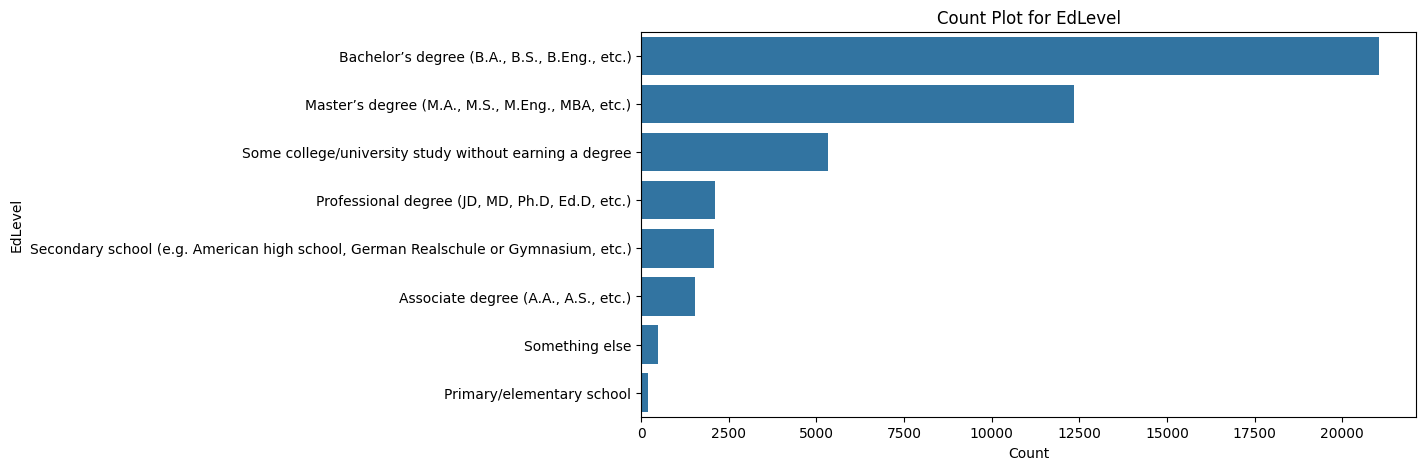

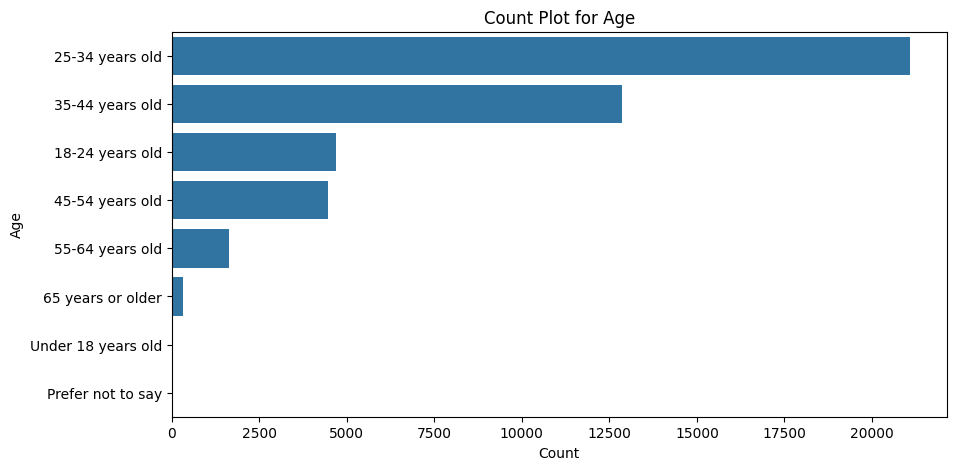

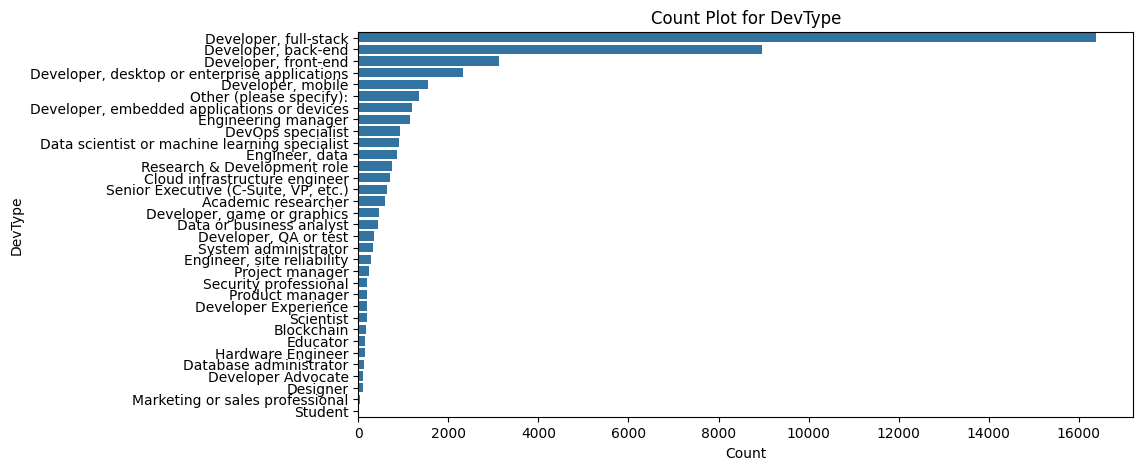

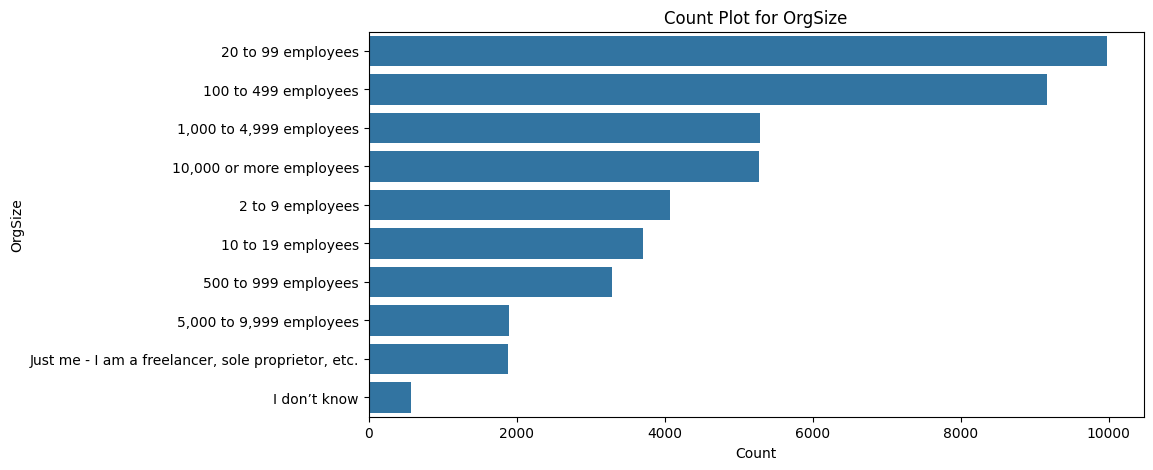

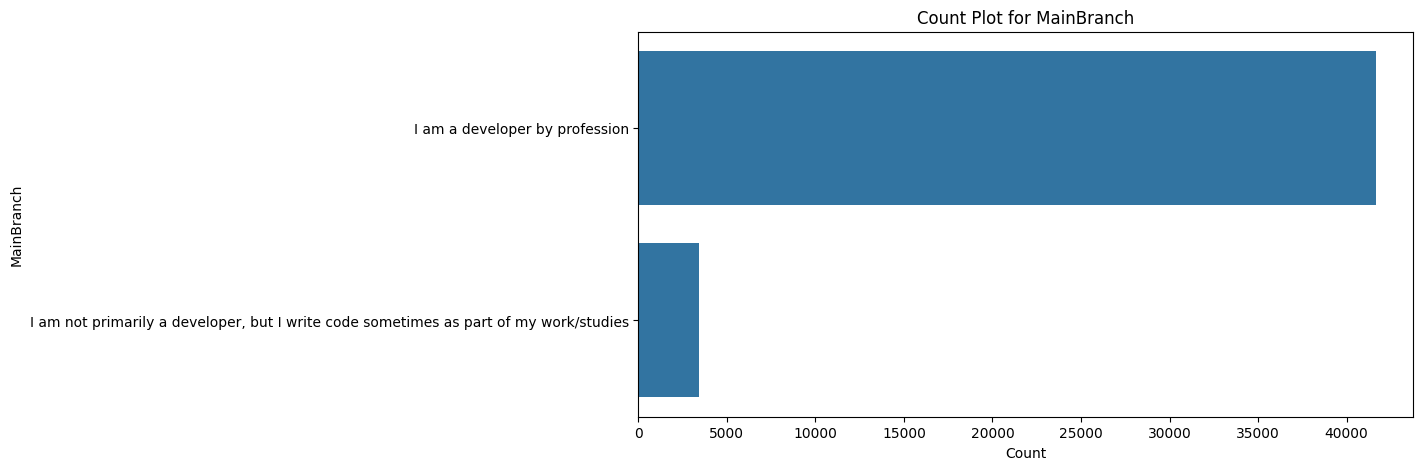

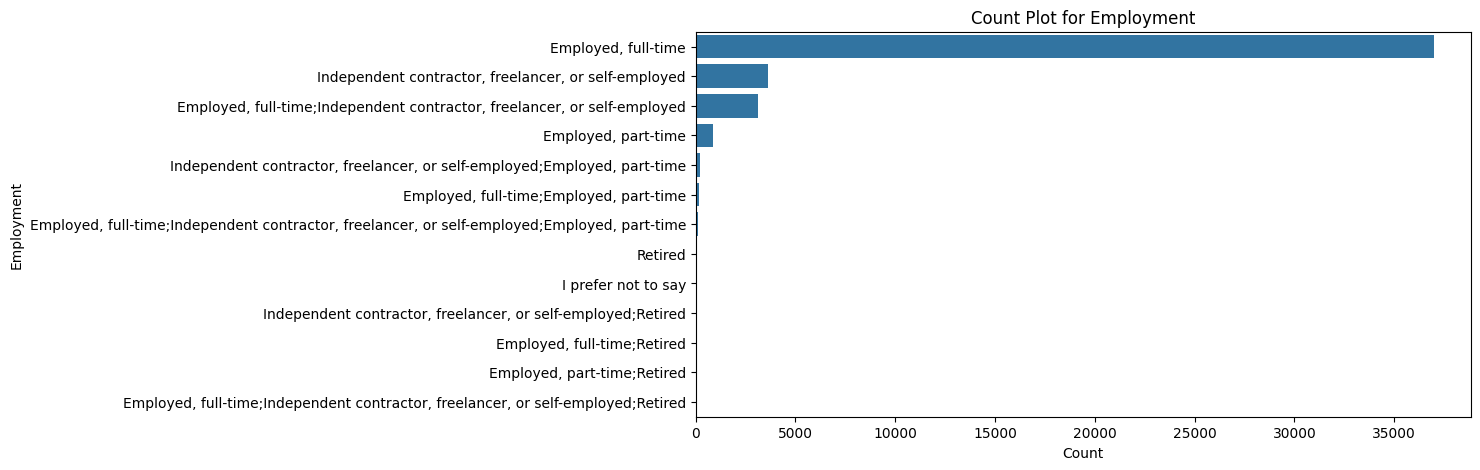

In [ ]:
# categorical_cols_for_count_plot contains the column names for which count plots will be created
categorical_cols_for_count_plot = ['RemoteWork', 'EdLevel', 'Age', 'DevType', 'OrgSize','MainBranch', 'Employment']

# Loop through each categorical column and create a count plot
for col in categorical_cols_for_count_plot:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_subset, y=col, order=df_subset[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

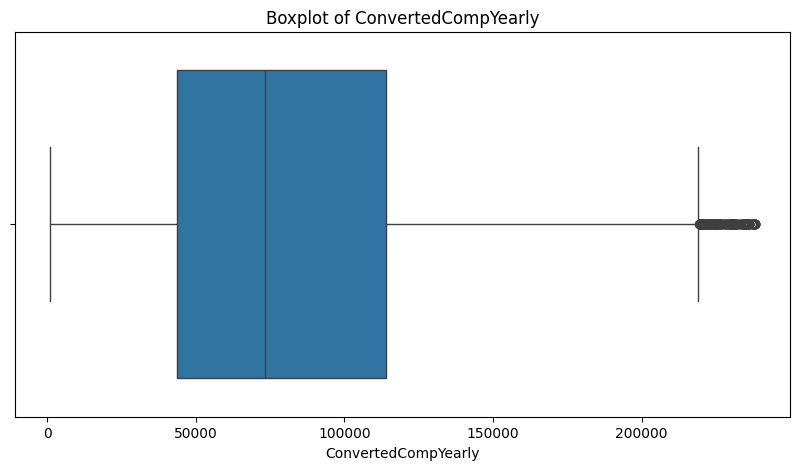

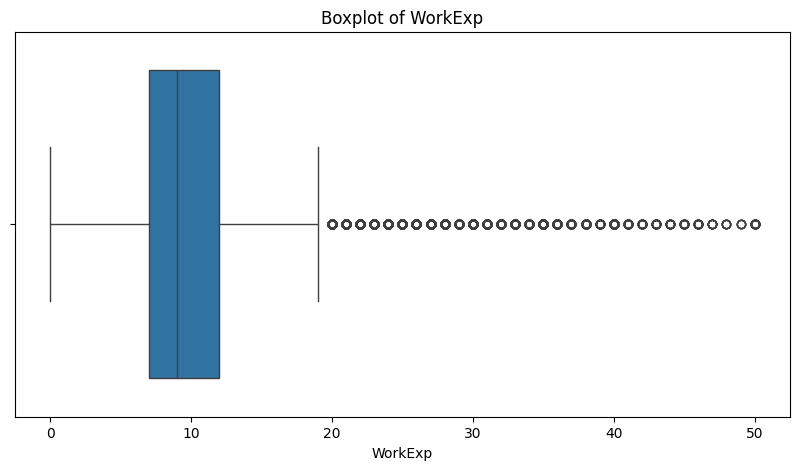

In [ ]:
# Boxplots for numerical data to check for outliers
for column in df_subset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=column, data=df_subset)
    plt.title(f'Boxplot of {column}')
    plt.show()


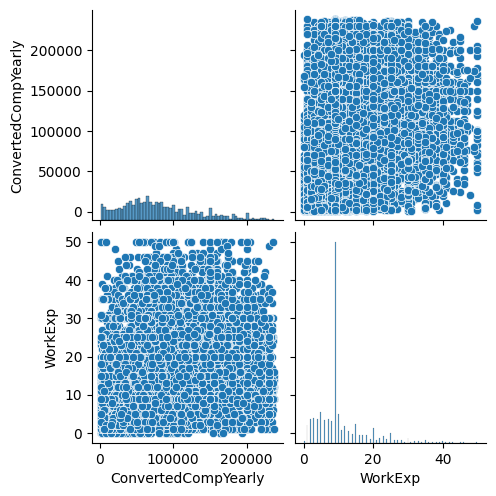

In [ ]:
# Pairplot to visualize the relationships between numerical variables
sns.pairplot(df_subset.select_dtypes(include=['float64', 'int64']))
plt.show()

<ipython-input-44-40658ba10b9e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_subset.corr(), annot=True, fmt='.2f', cmap=cmap)


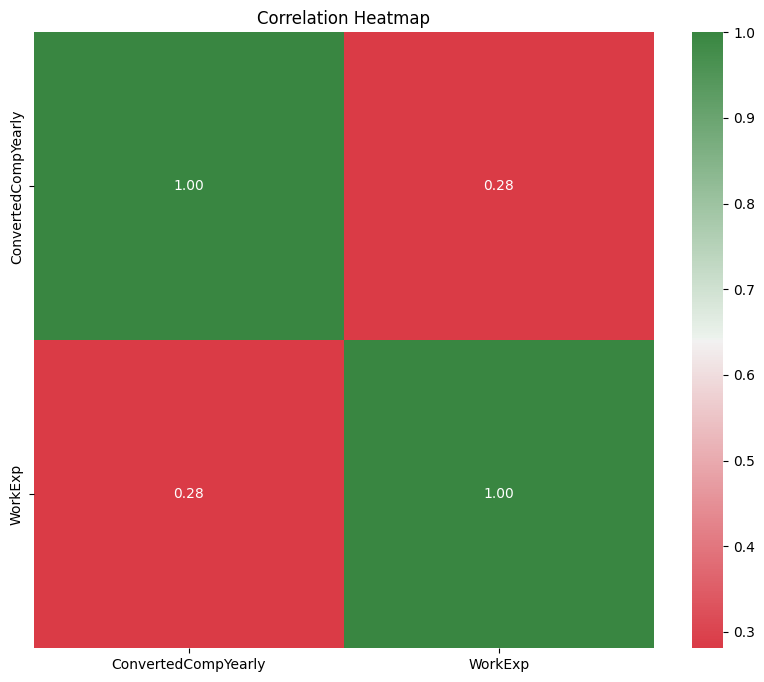

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(10, 130, as_cmap=True)
sns.heatmap(df_subset.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Removing outliers from 'WorkExp'
Q1 = df_subset['WorkExp'].quantile(0.25)
Q3 = df_subset['WorkExp'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers and creating a copy of the DataFrame
df_filtered_subset = df_subset[(df_subset['WorkExp'] >= lower_bound) & (df_subset['WorkExp'] <= upper_bound)].copy()

# Box-Cox transformation of the 'ConvertedCompYearly' column to address skewness.
df_filtered_subset['ConvertedCompYearly_BoxCox'], fitted_lambda = stats.boxcox(df_filtered_subset['ConvertedCompYearly'])



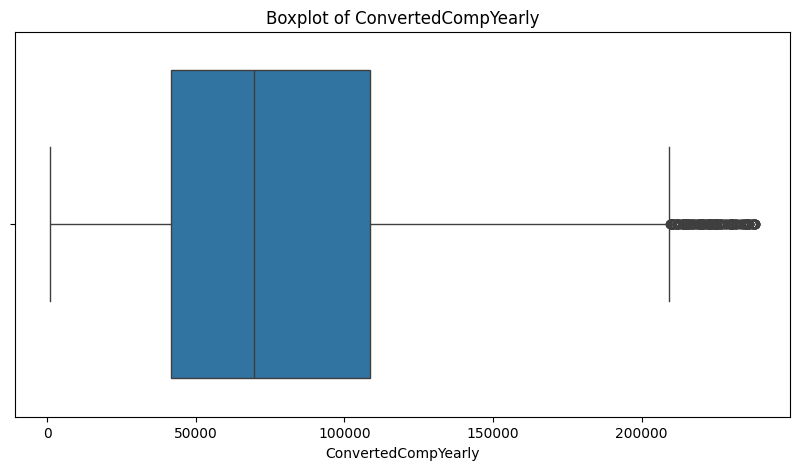

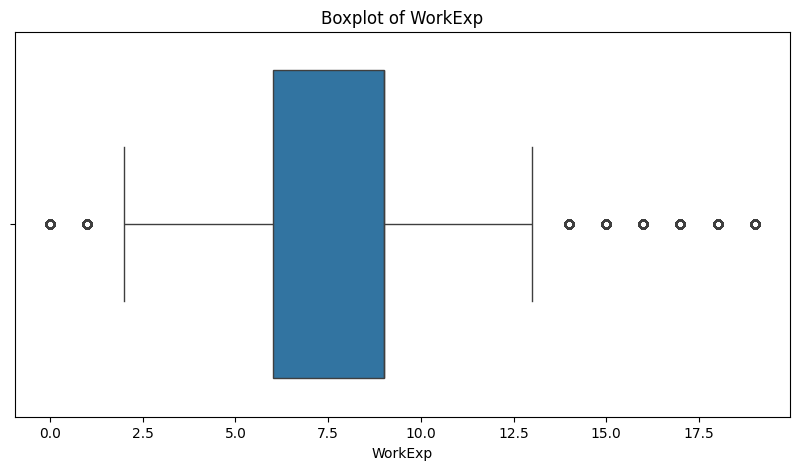

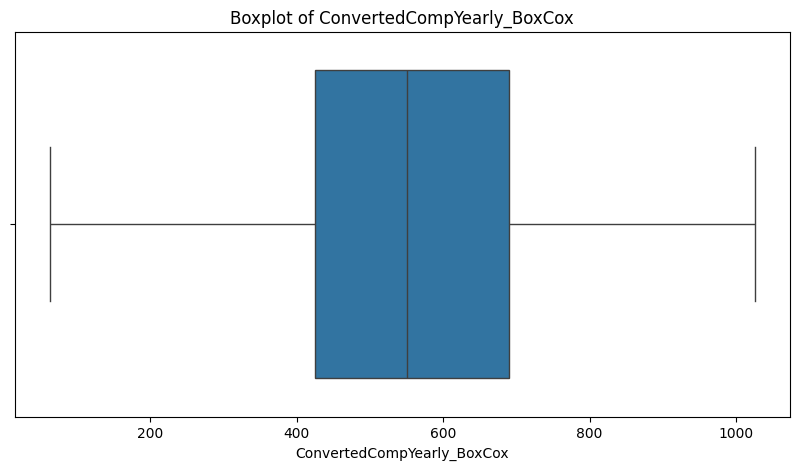

In [ ]:
# Boxplots for numerical data to check for outliers
for column in df_filtered_subset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=column, data=df_filtered_subset)
    plt.title(f'Boxplot of {column}')
    plt.show()

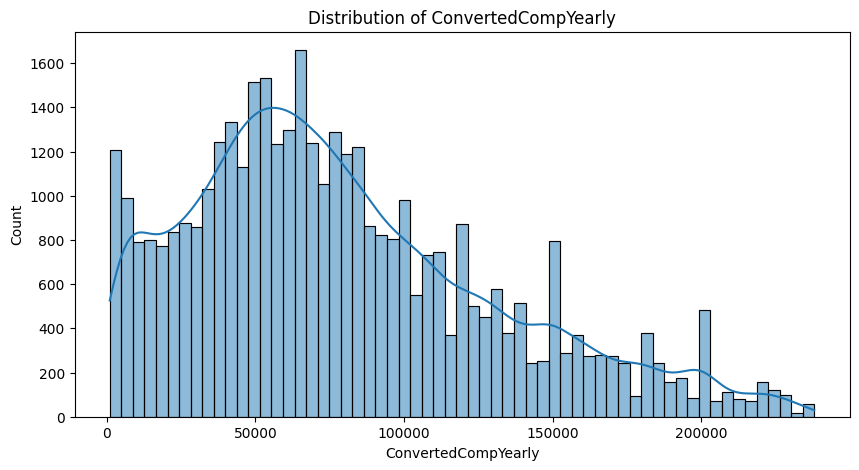

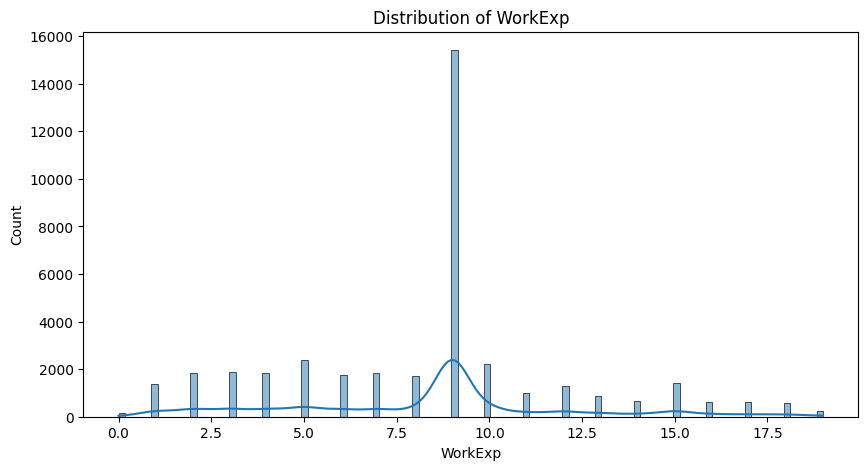

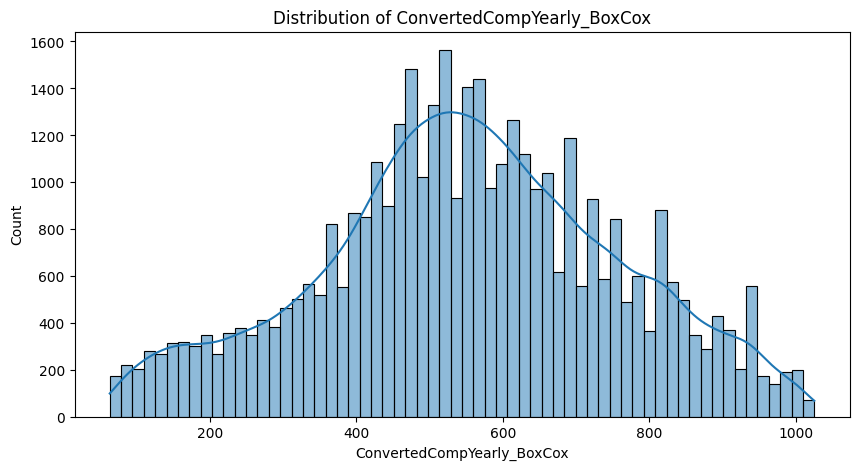

In [ ]:
# Distribution plots for numerical features
for column in df_filtered_subset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_filtered_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
df_filtered_subset.rename(columns={'ConvertedCompYearly_BoxCox': 'Salary'}, inplace=True)

In [ ]:
df_filtered_subset.head()

,MainBranch,Employment,RemoteWork,EdLevel,Age,CodingActivities,DevType,OrgSize,Country,ConvertedCompYearly,WorkExp,Salary
3,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Hobby,"Developer, front-end",100 to 499 employees,United States of America,156000.0,7.0,828.191156
4,I am a developer by profession,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Hobby;Contribute to open-source projects;Profe...,"Developer, full-stack",20 to 99 employees,Philippines,23456.0,6.0,316.902587
6,I am a developer by profession,"Employed, full-time",Remote,Some college/university study without earning ...,35-44 years old,Hobby;Contribute to open-source projects;Profe...,"Developer, full-stack","1,000 to 4,999 employees",United States of America,135000.0,4.0,769.739114
7,I am a developer by profession,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25-34 years old,Hobby,"Developer, full-stack",10 to 19 employees,United States of America,80000.0,5.0,590.542313
8,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",45-54 years old,Hobby;Contribute to open-source projects,System administrator,100 to 499 employees,Finland,64254.0,9.0,528.458868


In [ ]:
# Dropping the original 'ConvertedCompYearly' column
df_filtered_subset = df_filtered_subset.drop(['ConvertedCompYearly'], axis=1)

In [ ]:
# Categorical columns retained as important for model prediction of target variable
categorical_cols_to_retained = ['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'Age', 'CodingActivities', 'DevType', 'OrgSize', 'Country']

In [ ]:
# One-hot Encoding
df_encoded = pd.get_dummies(df_filtered_subset, columns=categorical_cols_to_retained)

In [ ]:
# Min-Max scaling for 'ConvertedCompYearly' - Normalized as 'Salary'
scaler = MinMaxScaler()

df_encoded['Salary_Scaled'] = scaler.fit_transform(df_encoded[['Salary']])

In [ ]:
df_encoded.shape

(39660, 348)

In [ ]:
# Dropping the original 'Salary' column
df_final = df_encoded.drop(['Salary'], axis=1)

In [ ]:
df_final.head()

,WorkExp,MainBranch_I am a developer by profession,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work/studies","Employment_Employed, full-time","Employment_Employed, full-time;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employment_Employed, full-time;Retired","Employment_Employed, part-time",...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,"Country_Venezuela, Bolivarian Republic of...",Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Salary_Scaled
3,7.0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.794908
4,6.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.263674
6,4.0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.734176
7,5.0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.547989
8,9.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.483483


In [ ]:
# Dataframe separated into input and target variables
X = df_final.values
y =  df_encoded['Salary_Scaled'].values

In [ ]:
X.shape

(39660, 347)

In [ ]:
# Separate train and test data
# The dataset is first split into train and test sets before applying PCA on the train set
# so that the test set is not exposed to any algorithm which might help in predicting the target variable

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state=100)

In [ ]:
# Apply PCA for dimensionality reduction to reduce multicollinearity
# PCA is specified to keep 95% of variance and figure out the best number of n_components

pca = PCA(0.95)

X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test) # X_test is transformed in preparation for preidiction and accuracy tests

print(X_train_pca.shape)
print(X_test_pca.shape)

(26572, 43)
(13088, 43)


## Supervised Learning

In [ ]:
# Collating model parameters
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'alpha': [1, 50, 100]
        }
    },
    'Lasso Regression': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}



In [ ]:
# Evaluate each model using cross-validation
results = []
names = []
scoring = 'neg_mean_squared_error'  # Negative MSE because cross_val_score aims to maximize utilities

for model_name, mp in model_params.items():
    model = mp['model']
    params = mp['params']

    # Use RepeatedKFold for regression tasks
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    cv_results = cross_val_score(model, X_train_pca, y_train, cv=cv, scoring=scoring)

    results.append(cv_results)
    names.append(model_name)

    print(f"{model_name}: Mean MSE: {np.mean(cv_results)} Std: {np.std(cv_results)}")


Linear Regression: Mean MSE: -0.009371897000168905 Std: 0.00017949131520728616
Ridge Regression: Mean MSE: -0.009371881494976371 Std: 0.00017953026105487863
Lasso Regression: Mean MSE: -0.045018310143374894 Std: 0.00045970795781898727
Random Forest: Mean MSE: -0.009586290272435734 Std: 0.00021360839992197944
Gradient Boosting: Mean MSE: -0.009620488926588216 Std: 0.00017919474157301348
Support Vector Regression: Mean MSE: -0.0054447534842309775 Std: 0.00010884779490778721


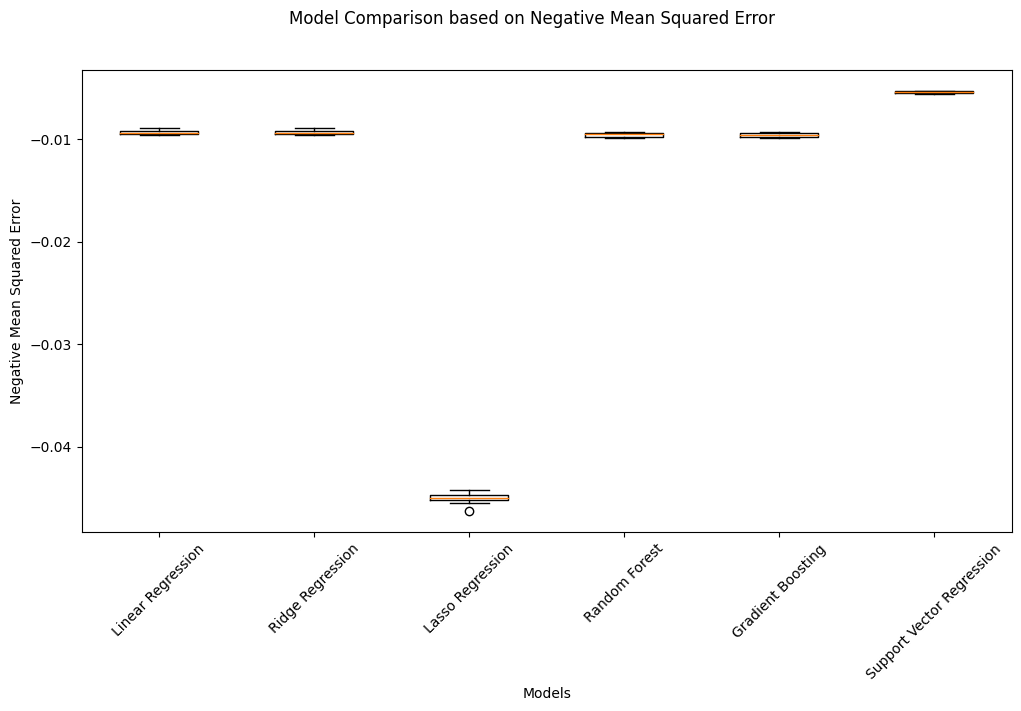

In [ ]:
# Visualize model performance
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Model Comparison based on Negative Mean Squared Error')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Models')
plt.ylabel('Negative Mean Squared Error')
plt.xticks(range(1, len(names) + 1), names, rotation=45)

plt.show()

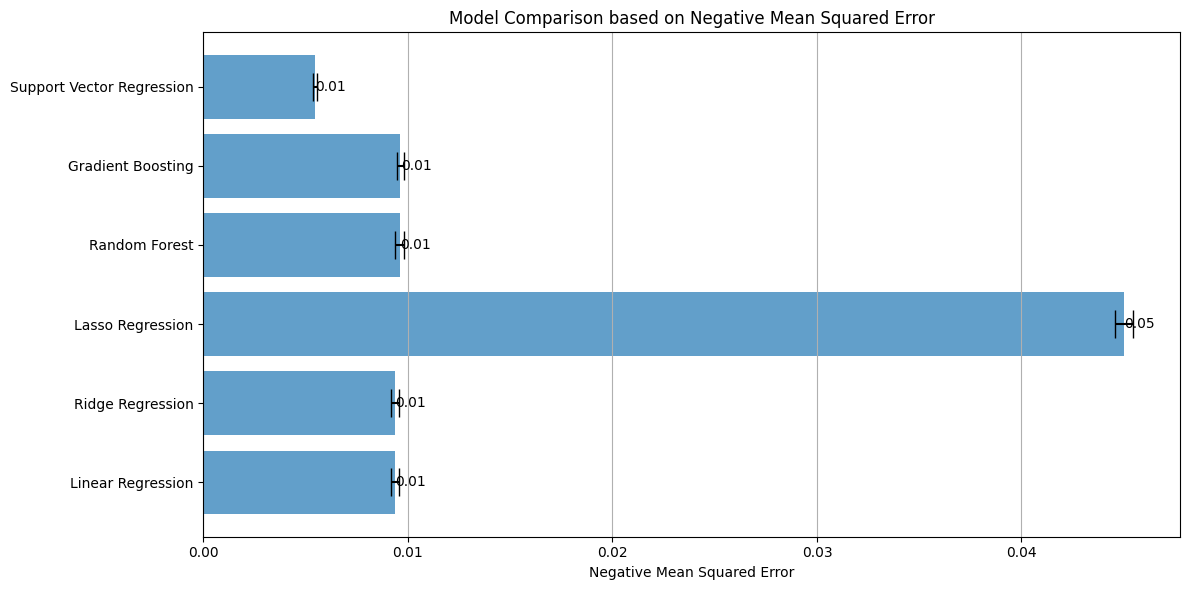

In [ ]:
# Calculate mean and standard deviation for each model's results
mean_scores = [-np.mean(result) for result in results]  # Negative is used to make scores positive as they represent NMSE
std_devs = [np.std(result) for result in results]

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Number of bars should match the number of models
bar_positions = np.arange(len(names)) + 1

# Horizontal bars
ax.barh(bar_positions, mean_scores, xerr=std_devs, align='center', alpha=0.7, ecolor='black', capsize=10)

# Add annotations for mean NMSE to the right of the bars
for i, v in enumerate(mean_scores):
    ax.text(v + max(std_devs) / 20, i + 1, "{:.2f}".format(v), ha='left', va='center')

ax.set_xlabel('Negative Mean Squared Error')
ax.set_yticks(bar_positions)
ax.set_yticklabels(names)
ax.set_title('Model Comparison based on Negative Mean Squared Error')
ax.xaxis.grid(True)  # Vertical gridlines (for the horizontal bars)

# Show plot
plt.tight_layout()
plt.show()


**Observation**:
The mean squared error (MSE) values show the average squared difference between the estimated values and the actual value, with lower values indicating better model performance. The standard deviation (Std) reflects the variation in MSE across different cross-validation folds.

* Linear, Ridge, and Random Forest regressions have similar MSEs, indicating comparable performance.
* Lasso Regression's significantly higher MSE suggests poorer performance, likely due to excessive penalty on coefficients.
* Gradient Boosting's MSE is slightly higher than Linear and Ridge, with a close performance.
* Support Vector Regression shows the lowest MSE, indicating the best performance among the compared models.

The consistency in performance across models, suggests that applied data preprocessing was effective.

The application of the corrective measures implemented improved the model output by enhancing data quality and relevance. By addressing missing values, outliers, and unrealistic salary figures, and through careful feature selection, the dataset's integrity was enhanced. These steps are essential for reducing noise and bias in the data, leading to more accurate and reliable model predictions.

### **TASK 2**

**Solution:**

To develop a scalable architecture for the data correction pipeline using Google Cloud services, the following steps are required:



**Cloud-based Storage**: Utilize Google Cloud Storage (GCS) for storing raw and processed data due to its high durability, scalability, and global availability. Google Cloud Storage (GCS) offers a secure and highly available object storage solution that's ideal for various data types, from large datasets to smaller files. Its global availability ensures data can be accessed swiftly from anywhere, and its scalability allows it to handle growth in data volume seamlessly.

**Data Ingestion**: Employ Google Cloud Pub/Sub for real-time data ingestion and event streaming, which allows for scalable and flexible data intake. Google Cloud Pub/Sub is a real-time messaging service that enables the ingestion of streaming data. It can scale automatically to meet demand, ensuring robust data intake for real-time analysis or downstream processing.

**Data Processing**: Use Google Cloud Dataflow for data processing, which is built on Apache Beam and provides a unified model for batch and stream data processing. Google Cloud Dataflow provides a managed service for executing a wide array of data processing patterns. The Apache Beam SDK underpins Dataflow, enabling batch and stream processing within the same model and simplifying pipeline development.

**Data Quality Checks**: Implement data validation and correction within Dataflow pipelines or use Google Cloud Dataprep for exploratory data analysis and data cleaning. Within Dataflow pipelines, functions can be implemented to perform data validation and correction. Alternatively, Google Cloud Dataprep offers a user-friendly interface for data cleaning and preparation, enhancing data quality without requiring extensive coding.

**Monitoring and Logging**: Leverage Google Cloud Operations (formerly Stackdriver) for monitoring, logging, and setting up alerts to keep track of the pipeline's health and performance. Google Cloud Operations suite offers monitoring and logging capabilities to track the pipeline's performance and health. It provides real-time insights and alerts, it helps to identify and resolve issues swiftly.

**Deployment Strategy**: Use Google Cloud Deployment Manager or Terraform for infrastructure as code (IaC) to automate the provisioning and management of cloud resources. Using Google Cloud Deployment Manager or Terraform allows one to define infrastructure through code, enabling automated, repeatable, and consistent deployment processes. This approach minimizes manual errors and enhances efficiency.

**Security**: Configure Identity and Access Management (IAM) roles and policies to ensure secure access to Google Cloud resources. Properly configuring IAM ensures that only authorized entities have access to specific resources, maintaining a strong security posture within the Google Cloud environment.

**Documentation**: Maintain comprehensive documentation on the architecture, data flows, processing logic, and security policies for clarity and future reference. Comprehensive documentation of your system's architecture, data flow, and processing logic is crucial for maintenance, troubleshooting, and compliance, ensuring clarity and continuity in operations.


The oulined approach ensures a scalable, efficient, and secure data correction pipeline in the Google Cloud ecosystem, enabling handling of large datasets and complex processing tasks effectively.